In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

c:\users\rutik\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\rutik\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\users\rutik\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv('preprocessed_data.csv')

In [3]:
numerical_columns = ['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
                    'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION',
                    'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'GENDER', 'WORK_LIFE_BALANCE_SCORE',
                    'AGE_21 to 35', 'AGE_36 to 50', 'AGE_51 or more', 'AGE_Less than 20']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [4]:
data

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,GENDER,WORK_LIFE_BALANCE_SCORE,AGE_21 to 35,AGE_36 to 50,AGE_51 or more,AGE_Less than 20
0,0.053598,-0.578838,-0.976195,-0.178885,-1.732447,-0.477639,-0.726028,-1.466526,-0.834747,0.096801,...,-1.639980,-0.553986,-1.218878,-0.408870,0.787532,-1.271734,-0.786906,1.559214,-0.519069,-0.358502
1,-0.639571,0.152309,-0.372295,-0.883050,0.735227,1.142280,0.362605,-0.386337,1.197968,-0.284294,...,0.609763,-0.877659,-0.486065,-0.077357,0.787532,-0.247710,-0.786906,1.559214,-0.519069,-0.358502
2,-0.639571,0.152309,-0.674245,-0.530967,-0.498610,1.142280,-0.363150,-0.386337,1.197968,-1.427581,...,0.609763,-0.553986,1.712376,-1.071895,0.787532,-0.780824,-0.786906,1.559214,-0.519069,-0.358502
3,0.053598,0.152309,1.439404,-0.883050,1.352145,0.170329,-0.726028,1.233946,1.197968,-1.046485,...,-1.639980,-0.230312,-0.486065,-2.066433,0.787532,-0.978521,-0.786906,-0.641349,1.926527,-0.358502
4,1.439936,-1.309984,-0.674245,-0.883050,1.352145,-0.801622,-0.726028,0.693851,1.197968,-0.284294,...,0.609763,0.740708,-0.852472,-0.408870,0.787532,-0.063341,-0.786906,-0.641349,1.926527,-0.358502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,0.053598,0.152309,-1.580094,-0.530967,-1.732447,1.142280,-1.451783,0.693851,1.197968,0.858992,...,-1.639980,-0.230312,-0.486065,-0.408870,0.787532,-0.494275,-0.786906,-0.641349,1.926527,-0.358502
15968,0.053598,0.152309,0.231605,0.877362,0.426768,-0.801622,0.725482,0.153757,-0.834747,0.477896,...,0.609763,1.388055,0.613156,0.585668,0.787532,1.069528,1.270799,-0.641349,-0.519069,-0.358502
15969,0.746767,0.152309,-1.580094,1.581527,1.352145,0.494312,0.725482,1.233946,-0.834747,0.477896,...,0.609763,1.388055,-0.852472,1.248693,-1.269789,1.107290,1.270799,-0.641349,-0.519069,-0.358502
15970,-1.332741,-1.309984,1.439404,0.877362,-1.115529,0.170329,-0.363150,-0.386337,-0.834747,0.096801,...,0.609763,-1.525007,0.979562,0.585668,0.787532,0.338717,1.270799,-0.641349,-0.519069,-0.358502


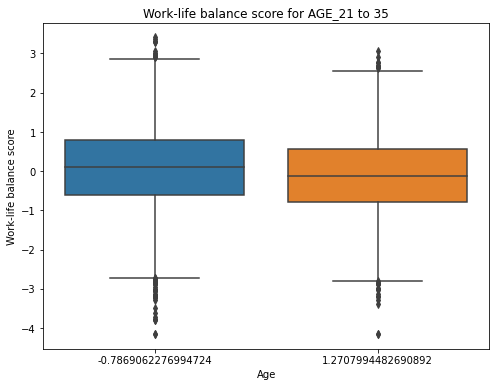

In [5]:
# Age vs. work-life balance score
plt.figure(figsize=(8,6))
sns.boxplot(x='AGE_21 to 35', y='WORK_LIFE_BALANCE_SCORE', data=data)
plt.xlabel('Age')
plt.ylabel('Work-life balance score')
plt.title('Work-life balance score for AGE_21 to 35')
plt.show()

<!-- ssssssssssssssssssssssssssssssssssssssss -->

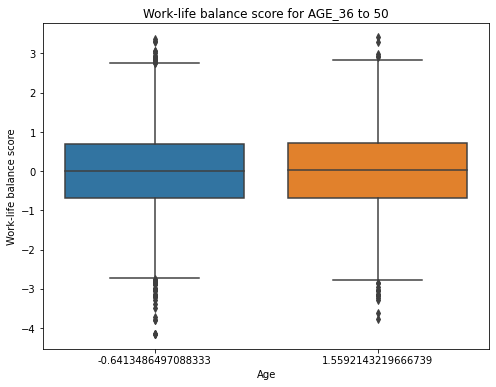

In [6]:
plt.figure(figsize=(8,6))
sns.boxplot(x='AGE_36 to 50', y='WORK_LIFE_BALANCE_SCORE', data=data)
plt.xlabel('Age')
plt.ylabel('Work-life balance score')
plt.title('Work-life balance score for AGE_36 to 50')
plt.show()

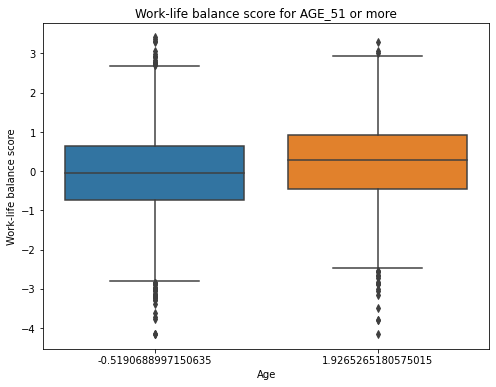

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot(x='AGE_51 or more', y='WORK_LIFE_BALANCE_SCORE', data=data)
plt.xlabel('Age')
plt.ylabel('Work-life balance score')
plt.title('Work-life balance score for AGE_51 or more')
plt.show()

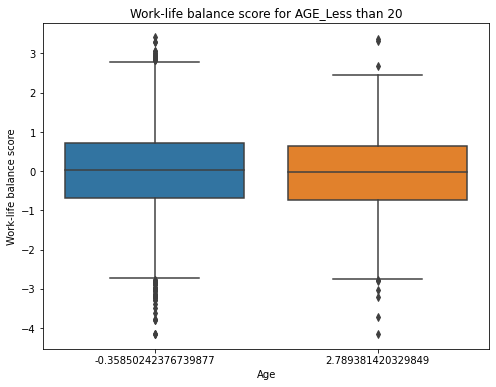

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(x='AGE_Less than 20', y='WORK_LIFE_BALANCE_SCORE', data=data)
plt.xlabel('Age')
plt.ylabel('Work-life balance score')
plt.title('Work-life balance score for AGE_Less than 20')
plt.show()

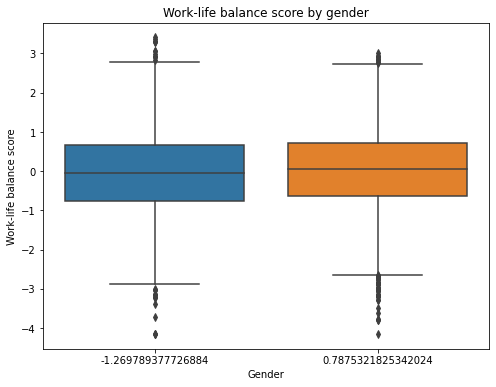

In [12]:
# Gender vs. work-life balance score
plt.figure(figsize=(8,6))
sns.boxplot(x='GENDER', y='WORK_LIFE_BALANCE_SCORE', data=data)
plt.xlabel('Gender')
plt.ylabel('Work-life balance score')
plt.title('Work-life balance score by gender')
plt.show()

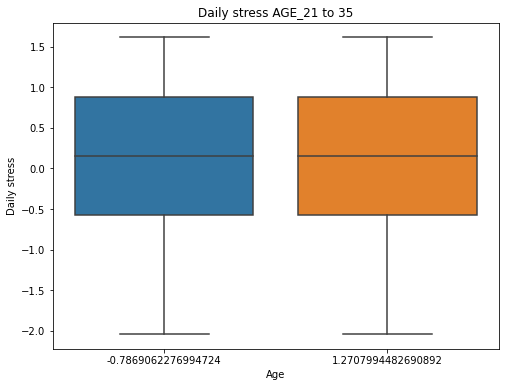

In [9]:
# Investigate potential differences in lifestyle and wellbeing factors across demographic groups

# Age vs. daily stress
plt.figure(figsize=(8,6))
sns.boxplot(x='AGE_21 to 35', y='DAILY_STRESS', data=data)
plt.xlabel('Age')
plt.ylabel('Daily stress')
plt.title('Daily stress AGE_21 to 35')
plt.show()

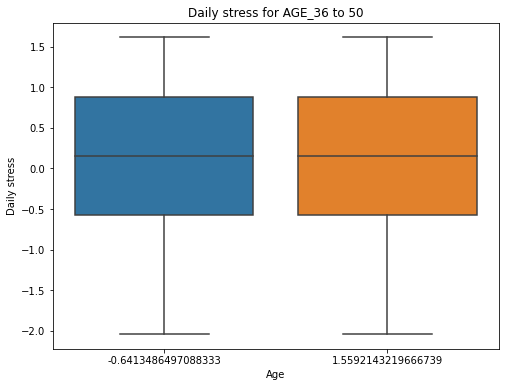

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x='AGE_36 to 50', y='DAILY_STRESS', data=data)
plt.xlabel('Age')
plt.ylabel('Daily stress')
plt.title('Daily stress for AGE_36 to 50')
plt.show()

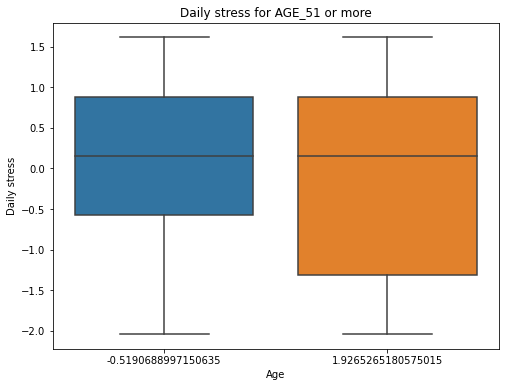

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(x='AGE_51 or more', y='DAILY_STRESS', data=data)
plt.xlabel('Age')
plt.ylabel('Daily stress')
plt.title('Daily stress for AGE_51 or more')
plt.show()

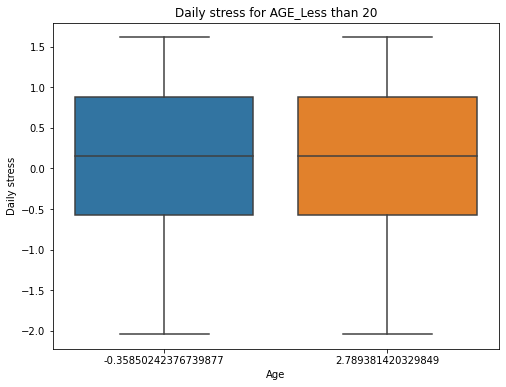

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x='AGE_Less than 20', y='DAILY_STRESS', data=data)
plt.xlabel('Age')
plt.ylabel('Daily stress')
plt.title('Daily stress for AGE_Less than 20')
plt.show()

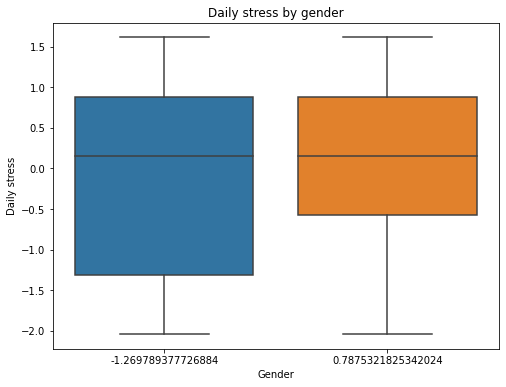

In [18]:
# Gender vs. daily stress
plt.figure(figsize=(8,6))
sns.boxplot(x='GENDER', y='DAILY_STRESS', data=data)
plt.xlabel('Gender')
plt.ylabel('Daily stress')
plt.title('Daily stress by gender')
plt.show()

# # Age vs. fruits and veggies consumption
# plt.figure(figsize=(8,6))
# sns.boxplot